<center><h1>Deep neural network with class weights on SR2 </h1>
John Ignacio R.M. Oct 2020</center>

In [1]:
# Ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada.data import read_dataset, split_dataset, scores_per_class_weights
from ada.model import BinaryClassifierModel4 as BC4
from ada.plot import plot_confidence_matrix
import pandas as pd
import numpy as np

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
# Constants
source_path = "../../processed_data/xtohhOct2020"
dest_path = "../../saved_models/oct_2020"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420
region = "SR"
tag = 2

In [3]:
# Read dataset
df = read_dataset(source_path, signal, bg, region, tag)
df.head()

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


# BC4 with different class weights and th

In [4]:
# Splitting dataset
sets = split_dataset(df, 0.5, 0.3, 0.2, seed)

In [5]:
scores = scores_per_class_weights(BC4, sets, 10, range(10, 21, 1), np.arange(0.1, 0.9, 0.1), dest_path, "SR2_Oct2020")

Loading bg weight: 10
Loading bg weight: 11
Loading bg weight: 12
Loading bg weight: 13
Loading bg weight: 14
Loading bg weight: 15
Loading bg weight: 16
Loading bg weight: 17
Loading bg weight: 18
Loading bg weight: 19
Loading bg weight: 20
2020-10-28 23:11:47.451546: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-10-28 23:11:47.590796: E tensorflow/stream_executor/cuda/cuda_driver.cc:351] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-10-28 23:11:47.590846: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valkyrie): /proc/driver/nvidia/version does not exist
2020-10-28 23:11:47.642373: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-28 23:11:47.900094: I tensorflow/core/platform/profile_utils/cpu_utils.cc:

In [7]:
scores.nlargest(10, [0])

0         1      wavg
bg_weight th                               
11        0.8  0.921093  0.983920  0.973235
          0.7  0.904445  0.981062  0.968031
19        0.7  0.878464  0.975048  0.958622
11        0.6  0.878011  0.976666  0.959888
13        0.6  0.877647  0.975729  0.959048
14        0.7  0.877388  0.974790  0.958224
19        0.6  0.877169  0.975329  0.958635
13        0.8  0.874399  0.973376  0.956543
11        0.5  0.872670  0.975964  0.958397
14        0.5  0.868782  0.974576  0.956584

In [8]:
scores.nlargest(10, ["wavg"])

0         1      wavg
bg_weight th                               
11        0.8  0.921093  0.983920  0.973235
          0.7  0.904445  0.981062  0.968031
          0.6  0.878011  0.976666  0.959888
13        0.6  0.877647  0.975729  0.959048
19        0.6  0.877169  0.975329  0.958635
          0.7  0.878464  0.975048  0.958622
11        0.5  0.872670  0.975964  0.958397
14        0.7  0.877388  0.974790  0.958224
          0.5  0.868782  0.974576  0.956584
13        0.8  0.874399  0.973376  0.956543

# BC4 with 11:10 class weights and th 0.8

In [9]:
model = BC4(sets["x"]["train"].shape[1])
model.load(dest_path, "bg11signal10_SR2_Oct2020")

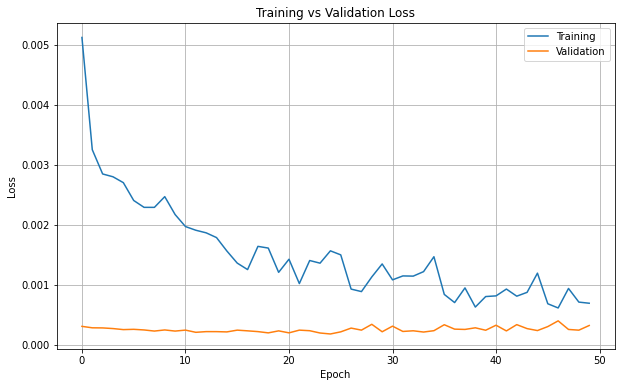

In [10]:
model.plot_loss()

Accuracy: 0.9732840679473523


,0,1,macro avg,weighted avg
precision,0.925377,0.982993,0.954185,0.973194
recall,0.916848,0.984849,0.950849,0.973284
f1-score,0.921093,0.983920,0.952506,0.973235
support,0.397218,1.938392,2.335610,2.335610


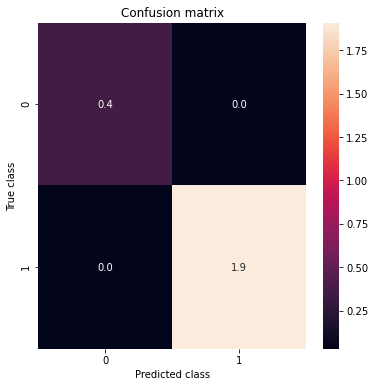

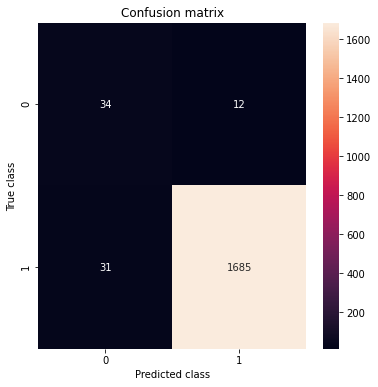

In [11]:
#eval_BC4_bg11signal10_SR2_Oct2020.json
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.8,
    save = True, dest_path = "./scores" , name = "bg11signal10_SR2_Oct2020",
)
print("Accuracy:", eval["weighted_accuracy"])
display(pd.DataFrame(eval["weighted_class_report"]))
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')
plot_confidence_matrix(eval["cm"], 6, 6, 'd')